In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.metrics import make_scorer, log_loss
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.decomposition import NMF
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
#bibliotecas de machine learning
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn import utils
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,KFold,GroupKFold
import lightgbm as lgb
import gc
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss

from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/andresramirez31/datosModelos/main/RegularSeasonDetailedResults.csv')
Teams=pd.read_csv('https://raw.githubusercontent.com/andresramirez31/datosModelos/main/Teams.csv')



In [ ]:
#Limpieza de datos
data = data.drop(["Daynum", "Numot"], axis=1)
data

,Season,Wteam,Wscore,Lteam,Lscore,Wloc,Wfgm,Wfga,Wfgm3,Wfga3,...,Lfga3,Lftm,Lfta,Lor,Ldr,Last,Lto,Lstl,Lblk,Lpf
0,2003,1104,68,1328,62,N,27,58,3,14,...,10,16,22,10,22,8,18,9,2,20
1,2003,1272,70,1393,63,N,26,62,8,20,...,24,9,20,20,25,7,12,8,6,16
2,2003,1266,73,1437,61,N,24,58,8,18,...,26,14,23,31,22,9,12,2,5,23
3,2003,1296,56,1457,50,N,18,38,3,9,...,22,8,15,17,20,9,19,4,3,23
4,2003,1400,77,1208,71,N,30,61,6,14,...,16,17,27,21,15,12,10,7,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76631,2017,1276,71,1458,56,N,27,48,10,23,...,15,6,8,14,18,10,15,4,3,13
76632,2017,1343,71,1463,59,N,25,52,11,26,...,20,13,19,14,20,12,7,4,5,13
76633,2017,1348,70,1433,63,N,24,54,8,20,...,14,17,22,23,24,8,5,4,1,16
76634,2017,1374,71,1153,56,N,26,52,10,19,...,24,14,18,17,22,7,7,7,1,13


In [ ]:
Wloc_mapping = {'H': 0, 'A': 1, 'N': 2}
data['Wloc'] = data['Wloc'].map(Wloc_mapping)

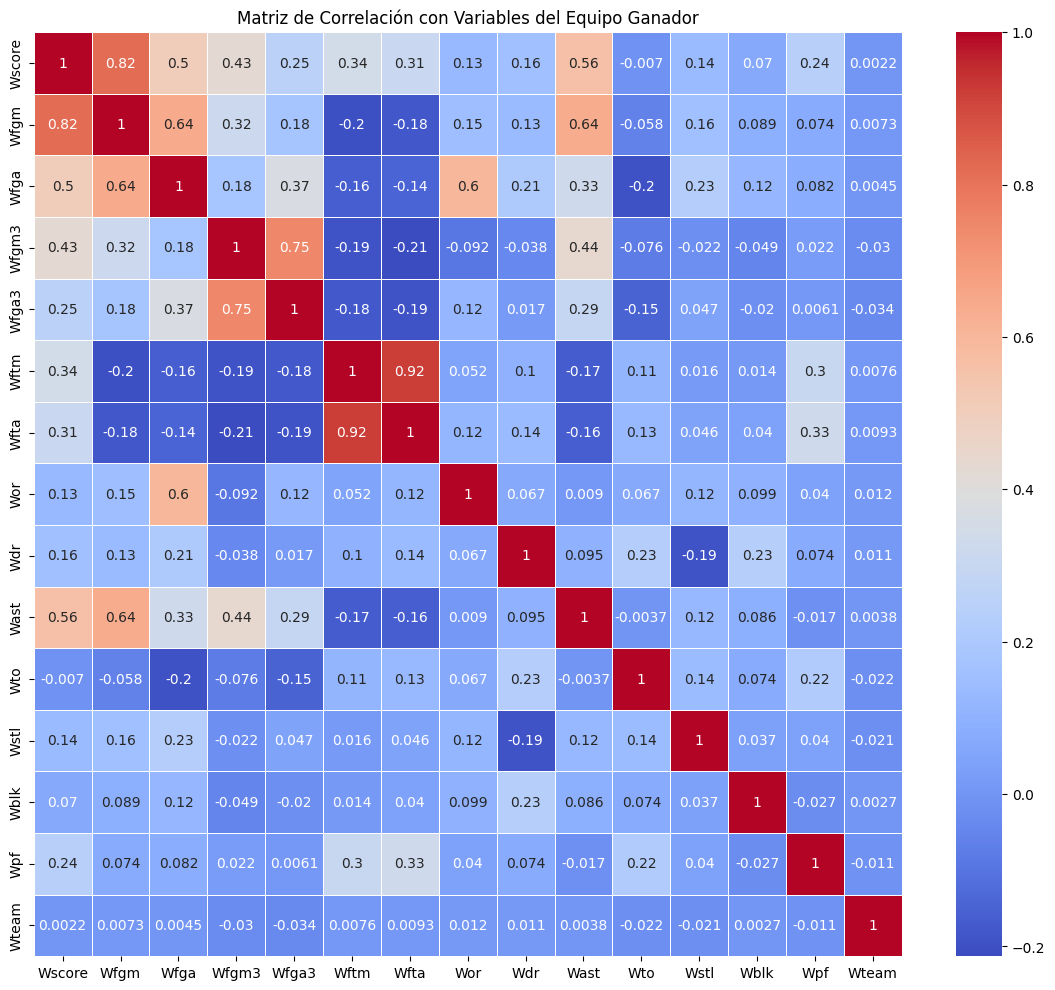

In [ ]:
df=data


# Realiza el análisis de correlación y elimina las variables con menos correlación según sea necesario
# Calcular la matriz de correlación
columnas_numericas_equipo_ganador = ['Wscore', 'Wfgm', 'Wfga', 'Wfgm3', 'Wfga3', 'Wftm', 'Wfta', 'Wor', 'Wdr', 'Wast', 'Wto', 'Wstl', 'Wblk', 'Wpf']

# Crea un nuevo DataFrame solo con estas columnas
df_equipo_ganador_numericas = df[columnas_numericas_equipo_ganador]

# Añade la variable objetivo 'Wteam' al DataFrame
df_equipo_ganador_numericas['Wteam'] = df['Wteam']

# Calcula la matriz de correlación
correlacion_equipo_ganador = df_equipo_ganador_numericas.corr()

# Visualiza la matriz de correlación como un mapa de calor
plt.figure(figsize=(14, 12))
sns.heatmap(correlacion_equipo_ganador, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Matriz de Correlación con Variables del Equipo Ganador")
plt.show()


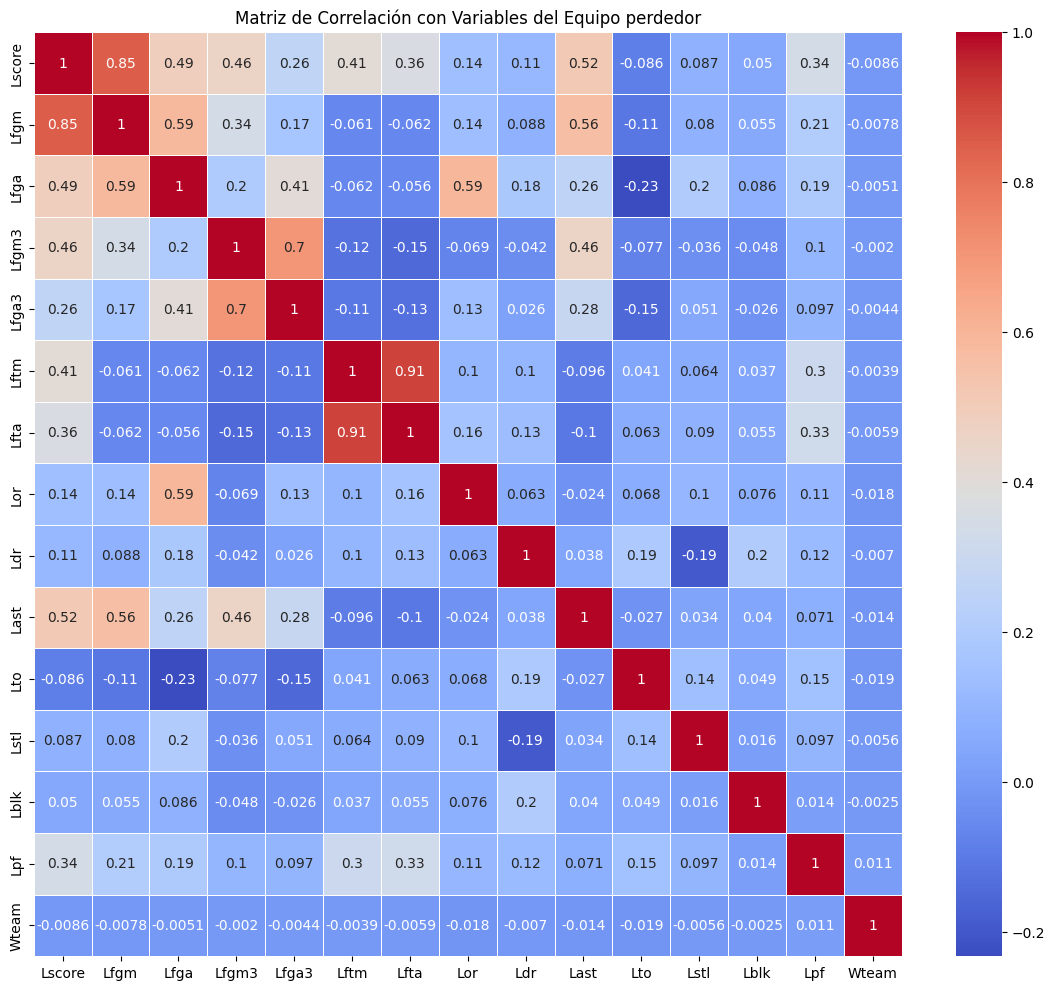

In [ ]:
df=data

columnas_numericas_equipo_perdedor = ['Lscore', 'Lfgm', 'Lfga', 'Lfgm3', 'Lfga3', 'Lftm', 'Lfta', 'Lor', 'Ldr', 'Last', 'Lto', 'Lstl', 'Lblk', 'Lpf']

# Crea un nuevo DataFrame solo con estas columnas
df_equipo_perdedor_numericas = df[columnas_numericas_equipo_perdedor]

# Añade la variable objetivo 'Wteam' al DataFrame
df_equipo_perdedor_numericas['Wteam'] = df['Wteam']

# Calcula la matriz de correlación
correlacion_equipo_perdedor = df_equipo_perdedor_numericas.corr()

# Visualiza la matriz de correlación como un mapa de calor
plt.figure(figsize=(14, 12))
sns.heatmap(correlacion_equipo_perdedor, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Matriz de Correlación con Variables del Equipo perdedor")
plt.show()


In [ ]:
#eliminamos las variables con alta correlacion
data = data.drop(['Lfgm', 'Wfgm'], axis=1)

In [ ]:
df=data

# Supongamos que 'df' es tu DataFrame con los datos

# Selecciona las columnas que serán características (X) y la variable objetivo (y)
columnas_caracteristicas = df.drop(['Wteam'], axis=1)
variable_objetivo = df['Wteam']
test_size=0.3
# Divide los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(columnas_caracteristicas, variable_objetivo, test_size=test_size)

# Verifica las dimensiones de los conjuntos de entrenamiento y prueba
print("Dimensiones del conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape, y_test.shape)


Dimensiones del conjunto de entrenamiento: (53645, 29) (53645,)
Dimensiones del conjunto de prueba: (22991, 29) (22991,)


In [ ]:
estimator1 = RandomForestClassifier(n_estimators=1, random_state=42)
estimator2 = LogisticRegression(random_state=42)
estimator3 = Perceptron(tol=1e-3, random_state=42)
estimators = [estimator1, estimator2, estimator3]
# Itera sobre los estimadores
for estimator in estimators:

    estimator.fit(X_train, y_train)


    y_pred = estimator.predict(X_test)


    accuracy_result = accuracy_score(y_test, y_pred)


    print(f"Accuracy para {estimator.__class__.__name__}: {accuracy_result}")

Accuracy para RandomForestClassifier: 0.009525466486886174
Accuracy para LogisticRegression: 0.014657909616806577
Accuracy para Perceptron: 0.003262146057152799


In [ ]:
# Define el modelo
rf_model = RandomForestClassifier(random_state=42)

# Define los hiperparámetros a ajustar
param_grid_rf = {
    'n_estimators': [5, 10, 15],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Realiza la búsqueda en cuadrícula
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Imprime los mejores hiperparámetros y la precisión asociada
print("Best Hyperparameters for Random Forest:")
print(grid_search_rf.best_params_)
print("Mejor Accuracy:", grid_search_rf.best_score_)


Best Hyperparameters for Random Forest:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 15}
Mejor Accuracy: 0.022481125920402648


In [ ]:
#implementacion mejores hiperparametros
RanFor = RandomForestClassifier(max_depth = 10, min_samples_leaf = 1, min_samples_split = 10, n_estimators = 15)
RanFor.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=15)

In [ ]:
from sklearn.linear_model import Perceptron
P = Perceptron(tol=1e-3, random_state=42)

# Define los hiperparámetros a ajustar
param_grid_p = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Realiza la búsqueda en cuadrícula
grid_search_p = GridSearchCV(estimator=P, param_grid=param_grid_p, cv=5, scoring='accuracy')
grid_search_p.fit(X_train, y_train)

# Imprime los mejores hiperparámetros y la precisión asociada
print("Mejores hiperparametros para Perceptron:")
print(grid_search_p.best_params_)
print("Mejor Accuracy:", grid_search_p.best_score_)


Mejores hiperparametros para Perceptron:
{'alpha': 0.001, 'penalty': 'l1'}
Mejor Accuracy: 0.0041569577779849


In [ ]:
#implementacion mejores hiperparametros
paramP = Perceptron(alpha= 0.001, penalty= 'l1')
paramP.fit(X_train, y_train)

Perceptron(alpha=0.001, penalty='l1')

In [ ]:

lr_model = LogisticRegression(random_state=42)

# Define los hiperparámetros a ajustar
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Realiza la búsqueda en cuadrícula
grid_search_lr = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

# Imprime los mejores hiperparámetros y la precisión asociada
print("Mejores hiperparametros para Logistic Regression:")
print(grid_search_lr.best_params_)
print("Mejor Accuracy:", grid_search_lr.best_score_)


Mejores hiperparametros para Logistic Regression:
{'C': 0.01, 'penalty': 'l2'}
Mejor Accuracy: 0.017037934569857395


In [ ]:
#implementacion mejores hiperparametros
Logis = LogisticRegression(C= 0.01, penalty= 'l2')
Logis.fit(X_train, y_train)

LogisticRegression(C=0.01)

In [ ]:
# Aplica PCA para reducir la dimensionalidad
n_components = [3, 5]  # Elige el número de componentes principales que deseas retener
for i in n_components:
  pca = PCA(n_components=i)
  X_train_pca = pca.fit_transform(X_train)
  X_test_pca = pca.transform(X_test)
  # Entrenar los modelos con los datos de entrenamiento después de PCA
  RanFor.fit(X_train_pca, y_train)
  paramP.fit(X_train_pca, y_train)
  Logis.fit(X_train_pca, y_train)
  # Realizar predicciones en el conjunto de prueba después de PCA
  rf_predictions = RanFor.predict(X_test_pca)
  paramP_predictions = paramP.predict(X_test_pca)
  lr_predictions = Logis.predict(X_test_pca)
  # Evaluar el rendimiento después de PCA utilizando accuracy
  rf_accuracy = accuracy_score(y_test, rf_predictions)
  paramP_accuracy = accuracy_score(y_test, paramP_predictions)
  lr_accuracy = accuracy_score(y_test, lr_predictions)
  print("Random Forest Accuracy despues de PCA:", rf_accuracy)
  print("Perceptron Accuracy despues de PCA:", paramP_accuracy)
  print("Logistic Regression Accuracy despues de PCA:", lr_accuracy)

Random Forest Accuracy despues de PCA: 0.017093645339480667
Perceptron Accuracy despues de PCA: 0.002131268757339829
Logistic Regression Accuracy despues de PCA: 0.008960027836979688
Random Forest Accuracy despues de PCA: 0.023269975207689964
Perceptron Accuracy despues de PCA: 0.003871079987821321
Logistic Regression Accuracy despues de PCA: 0.013396546474707494


In [ ]:
nmf = NMF(n_components=5)
X_train_nmf = nmf.fit_transform(X_train)
X_test_nmf = nmf.transform(X_test)
for estimator in [RanFor, paramP, Logis]:
    # Entrenar el modelo
    estimator.fit(X_train_nmf, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = estimator.predict(X_test_nmf)

    # Calcular la precisión del clasificador
    accuracy = accuracy_score(y_test, y_pred)

    # Imprimir el rendimiento del modelo
    print(f'Accuracy for {estimator.__class__.__name__}: {accuracy}')

Accuracy for RandomForestClassifier: 0.002609716845722239
Accuracy for Perceptron: 0.00034796224609629856
Accuracy for LogisticRegression: 0.0037405941455352096


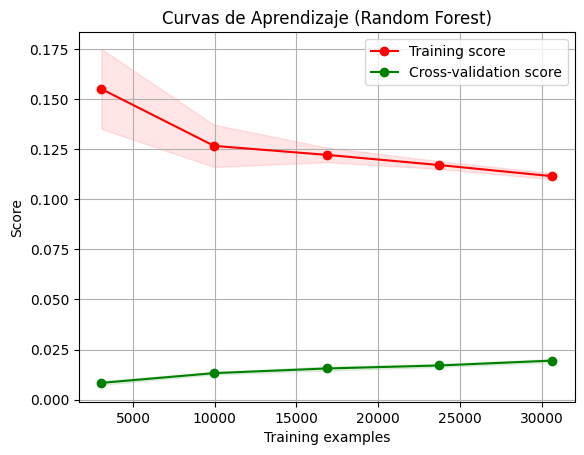

In [ ]:
model = RanFor
test_size = 0.3
val_size  = test_size/(1-test_size)
# Función para crear curvas de aprendizaje
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Crear curvas de aprendizaje
title = "Curvas de Aprendizaje (Random Forest)"
cv = ShuffleSplit(n_splits=5, test_size=val_size)
plot_learning_curve(model, title, X_train, y_train, cv=cv, n_jobs=4)

plt.show()

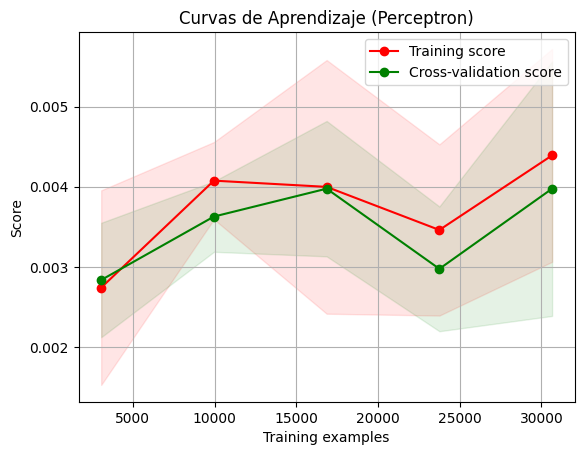

In [ ]:
model = paramP

# Crear curvas de aprendizaje
title = "Curvas de Aprendizaje (Perceptron)"
cv = ShuffleSplit(n_splits=5, test_size=val_size)
plot_learning_curve(model, title, X_train, y_train, cv=cv, n_jobs=4)

plt.show()

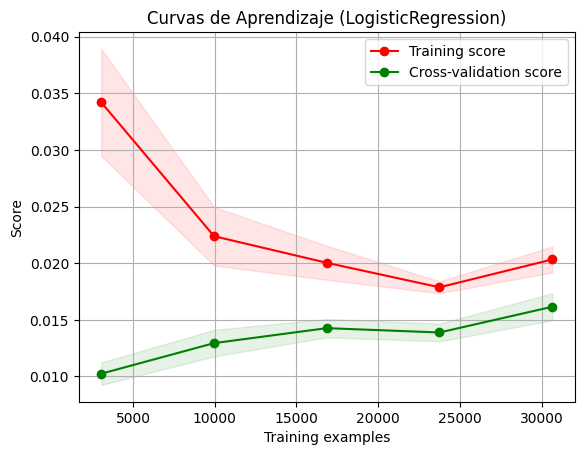

In [ ]:
model = Logis

# Crear curvas de aprendizaje
title = "Curvas de Aprendizaje (LogisticRegression)"
cv = ShuffleSplit(n_splits=5, test_size=val_size)
plot_learning_curve(model, title, X_train, y_train, cv=cv, n_jobs=4)

plt.show()

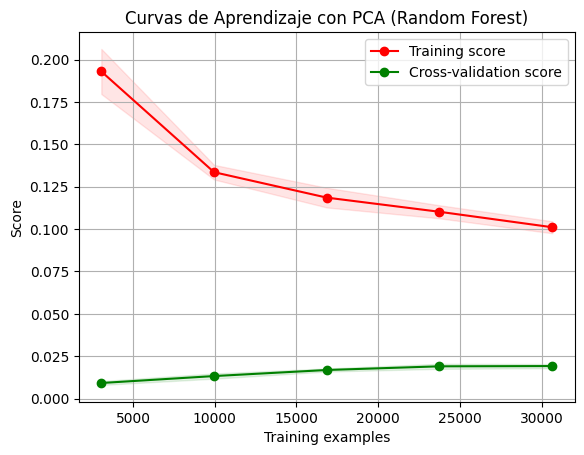

In [ ]:
title = "Curvas de Aprendizaje con PCA (Random Forest)"
cv = ShuffleSplit(n_splits=5, test_size=val_size)
plot_learning_curve(RanFor, title, X_train_pca, y_train, cv=cv, n_jobs=4)

plt.show()

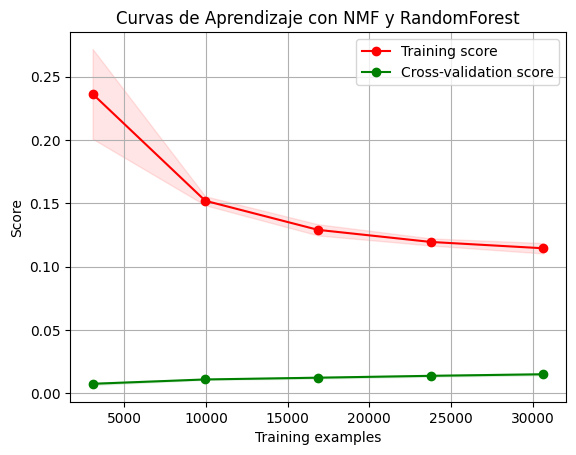

In [ ]:
# Aplicar NMF a tus datos

# Crear curvas de aprendizaje con NMF
title = "Curvas de Aprendizaje con NMF y RandomForest"
plot_learning_curve(RanFor, title, X_train_nmf, y_train, cv=cv, n_jobs=4)

plt.show()